<h1 align="center">  Building a Content-based Job Recommendation System in Python</h1>
<p align="center">  Author: Redacted</p>
<p align="center">  </div>
<p align="center">
October 30, 2022
</p>

<p align="center">
    <img src="./assets/intro.jpeg" style="height: 500px; width:700px;"/>

# Introduction
It is not always easy to become a working adult. Anyone who has been searching for a job for an extended period of time understands the difficulties of finding a job in today's market. It is possible that you will even begin to wonder if you are not as employable as you thought you were. Despite what you may think, you are not alone. The same frustrations are experienced by millions of other job seekers around the world [[1]](#references). 

The purpose of this article is to provide an overview of how to build a content-based job recommendation system using Python. We will utilize [Kaggle's Job Recommendation Case Study](https://www.kaggle.com/datasets/jsrshivam/job-recommendation-case-study) dataset, which contains information about a variety of jobs in the United States and information about users seeking employment, as well as their employment history. Content-based recommenders rely on the similarity of items when making recommendations to users. The first system will suggest jobs based on job titles, descriptions, cities, and states, and the second system will suggest jobs based on a speciifc user and their previous job history comapred to the jobs available. The final product can be found [here](https://job-recommender-ds.herokuapp.com/). 

## Types of recommender systems:
In order to understand job recommendations in more detail, we need to distinguish between two major types of recommendation filtering systems: Collaborative filtering and content-based filtering.

### Collaborative Filtering:
In collaborative filtering, items are recommended based solely on user-item interactions recorded in the past. A collective filtering process involves identifying similar user preferences, classifying users according to their preferences, and making recommendations based on those preferences within clusters. Through the analysis of past user-item interactions, the collaborative method uses the gathered facts and insights to make predictions based on the similarity between users and items. Each user and item is described by a feature vector or embedding. It is not necessary to provide information about the items themselves when using collaborative filtering, but rather to provide information about the users' preferences for the items. With the addition of new items and users, collaborative filtering may suffer from the [cold start problem](https://discovery.ucl.ac.uk/id/eprint/1474118/#:~:text=The%20cold%2Dstart%20problem%2C%20which,profile%20before%20making%20any%20recommendations.), since we are unable to classify new users into clusters due to a lack of information about them when they first join the system [[7]](#references).

### Content-Based Filtering:
Content-based filtering utilizes data that users provide, either explicitly (ratings) or implicitly (clicks on links). This approach is designed to identify items that contain certain keywords, determine what the user likes, and then determine other items similar to the previously liked items. For a job recommendation system, keywords can be extracted from a variety of attributes, including job titles, descriptions, requirements, and locations where employment opportunities are advertised. An intuitive basis for this type of recommendation system is that if a user works at a particular job, they may want to work somewhere similar [[8]](#references).

For example, if a user is currently working as a Vacation Sales Advisor in Orlando that has the following job description:

- Vacation Sales Advisor description: *"Challage your potential. Earn up to $1,000/week with Top Performers Earning More Vacation Sales Advisors: we encourage you to come join us! The more getaways you sell, the more money you will earn. Telephone sales experience is required.  Call us for an interview: 407-963-1928. Source - Orlando Sentinel"*

then using a content-based recommendation system might recommend the position titled "Vacation Sales Representatives" in Orlando, given the similar job titles, the fact that they are both located in Orlando, and the similar characteristics of the job description as seen below:

- Vacation Sales Representatives description: *"If you are a driven, money-motivated sales professional, come join us! Sell discounted, funfilled vacation packages to referrals, past guests and owners and experience unlimited earning potential! Telephone sales experience is required. Call now to schedule your interview! 407-967-4820. Source - Orlando Sentinel”*

<center><figure>
        <img  src="./assets/strat.png" style="height: 400px; width:650px;  align=center">
        <figcaption style="text-align: center;">Collaborative filtering and content-based filtering</figcaption>
    </figure></center>

### Advantages and Disadvantages of content-based filtering

Since the dataset consists only of implicit feedback, we have chosen the Content-Based Filtering algorithm. Algorithms that require explicit feedback, such as ratings and user reviews, cannot be applied as no explicit feedback is provided in the datasets. The implementation of content-based filtering is also possible due to the large number of features provided for each job in our dataset.

**Advantages of content-based filtering:**

- Cold-start problems can be avoided.

- Different approaches can be used depending on the representation of the content, such as text processing techniques, inferences, etc. 

- The recommendations are more transparent to the users. 

**Disadvantages of content-based filtering:**

- It is common for them to overspecialize: they suggest items similar to those already consumed, resulting in the creation of a "filter bubble" [[2]](#references).

- They lack novelty and diversity.

- They can be time-consuming and difficult to scale due to the arduous, never-ending nature of attribute assignments.


# Implementation:
As part of the implementation of the recommendation system, a data science lifecycle was followed. The question posed was “How to create a content-based job recommendation system in Python”. Next, the data had to be collected. There were many datasets that provided information on job seekers and job openings, however, many of them contained insufficient data or too much missing data for our application. We selected a [Kaggle dataset](https://www.kaggle.com/datasets/jsrshivam/job-recommendation-case-study) that contains recruitment data from 59 countries. This was filtered for jobs and users currently listed in the United States. We then conducted an analysis of the data. The different users were examined with respect to their majors, work experience, and the cities in which they reside. In addition, the job dataset was analyzed in order to determine which cities had the highest number of job openings. We were able to identify a pattern of job seekers and job openings across the country based on this information. Using this data, a content-based job recommendation system was built in Python (found [here](https://job-recommender-ds.herokuapp.com/)). Additionally, the application allows users to filter jobs based on different attributes before the recommender makes a recommendation.

<center><figure>
        <img  src="./assets/DSlife.png" style="height: 300px; width:950px; align=center">
        <figcaption style="text-align: center;">Data cycle lifecycle</figcaption>
    </figure></center>

## Setting up the environment 
The first step in building a recommendation system is to set up our development environment and install the Python libraries. I will be using Jupyter Notebook as my Python development environment. 

In [5]:
## Uncomment if you need to install any of the following packages:
# !pip3 install numpy
# !pip3 install pandas
# !pip3 install matplotlib
# !pip3 install nltk
# !pip3 install re
# !pip3 install missingno
# !pip3 install sklearn
# !pip3 install ipywidgets
# !pip3 install plotly
# !pip3 install scipy
# !pip3 install seaborn

The libraries used are listed below:
- **numpy:** Used for working with arrays.
- **pandas:** Used for data analysis.
- **matplotlib, seaborn, plotly:** Used for visual representations.
- **nltk.corpus:** Used for symbolic and statistical natural language processing for English written in the Python programming language.
- **re:** Used to create regular expressions for the data cleaning.
- **missingno:** Used to visualize missing data.
- **sklearn:** Used for making use of Machine learning tools.
- **ipywidgets:**  Used for interactive widgets in Jupyter notebook.
- **random:** Used to generate random values.

In [6]:
# Data manipulation
import numpy as np
import pandas as pd
from pandas.core.common import SettingWithCopyWarning
import warnings
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
import re
import random

# Data visualizations
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns
import missingno as msno

# Stopwords
import nltk
from nltk.corpus import stopwords

# Machine learning
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Jupyter notebook widgets
import ipywidgets as widgets

# Constant colour palette
colors = sns.color_palette('pastel')

# Display graphs inline
%matplotlib inline

## Loading the data
After setting up our environment and importing the libraries, let's load our data into the Jupyter notebook and begin exploring it.

The [Job Recommendation Case Study](https://www.kaggle.com/datasets/jsrshivam/job-recommendation-case-study) Kaggle dataset consists of 7 different 'tsv' files of which the following 3 were of use to us:

- **users.tsv:** contains 389708 different users, along with their IDs, city and state of residence, degrees and majors, work experience, and management experience.
- **jobs.tsv:** contains 1040750 different jobs that are currently available along with the job ID, title, description, requirements, and location.
- **user_history.tsv:** contains 1753901 entries describing past job experiences of all users, which includes the job title and the user ID.

In [7]:
# If the ../data/full/... is loaded then the full dataset is used (this was not included in the github)
# If the ../data/sample/... is loaded then a sample dataset is used (this was included in the github)
# The reuslts however were run on the full dataset

# Reading in the TSV files:
users_df =  pd.read_csv('../data/full/users.tsv', sep='\t', encoding='utf-8', low_memory=False)
jobs_df = pd.read_csv('../data/full/jobs.tsv', sep='\t', encoding='utf-8', on_bad_lines='skip', low_memory=False)
original_jobs_df = jobs_df.copy()
users_history_df = pd.read_csv('../data/full/user_history.tsv', sep='\t', encoding='utf-8', low_memory=False)

# Total number of entries for each file:
print("Total rows per dataset:")
print("-------------------------------")
print("users_df: \t \t" + str(len(users_df)))
print("jobs_df:  \t \t" + str(len(jobs_df)))
print("users_history_df: \t" + str(len(users_history_df)))

Total rows per dataset:
-------------------------------
users_df: 	 	389708
jobs_df:  	 	1040750
users_history_df: 	1753901


In [8]:
# Dataset containing the different users looking for jobs
users_df.head(2)

,UserID,City,State,Country,ZipCode,DegreeType,Major,GraduationDate,WorkHistoryCount,TotalYearsExperience,CurrentlyEmployed,ManagedOthers,ManagedHowMany
0,47,Paramount,CA,US,90723,High School,NaN,1999-06-01 00:00:00,3,10.0,Yes,No,0
1,72,La Mesa,CA,US,91941,Master's,Anthropology,2011-01-01 00:00:00,10,8.0,Yes,No,0


In [9]:
# Dataset containing the different job openings
jobs_df.head(2)


,JobID,Title,Description,Requirements,City,State,Country,Zip5
0,1,Security Engineer/Technical Lead,<p>Security Clearance Required:&nbsp; Top Secr...,<p>SKILL SET</p>\r<p>&nbsp;</p>\r<p>Network Se...,Washington,DC,US,20531
1,4,SAP Business Analyst / WM,<strong>NO Corp. to Corp resumes&nbsp;are bein...,<p><b>WHAT YOU NEED: </b></p>\r<p>Four year co...,Charlotte,NC,US,28217


In [10]:
# Dataset containing the job history of the users.
users_history_df.head(2)

,UserID,Sequence,JobTitle
0,47,1,National Space Communication Programs-Special ...
1,47,2,Detention Officer


Next, it is necessary to determine whether any values are missing from the datasets. We will make use of the [Missingno](https://packages.fedoraproject.org/pkgs/python-missingno/python3-missingno/index.html) Python library. This library provides a series of visualisations for understanding the presence and distribution of missing data within pandas dataframes.

<AxesSubplot:>

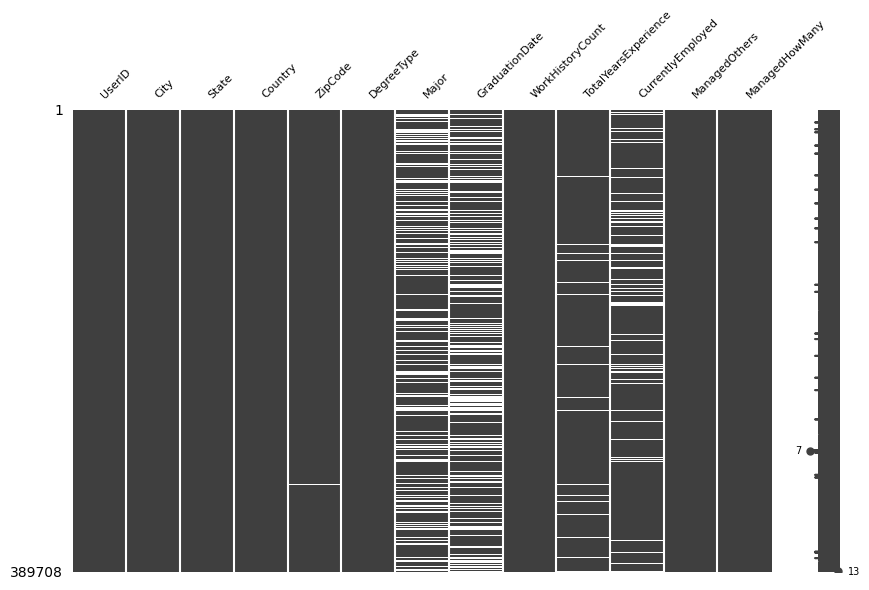

In [11]:
msno.matrix(users_df, fontsize=8, figsize=(10, 6))

<AxesSubplot:>

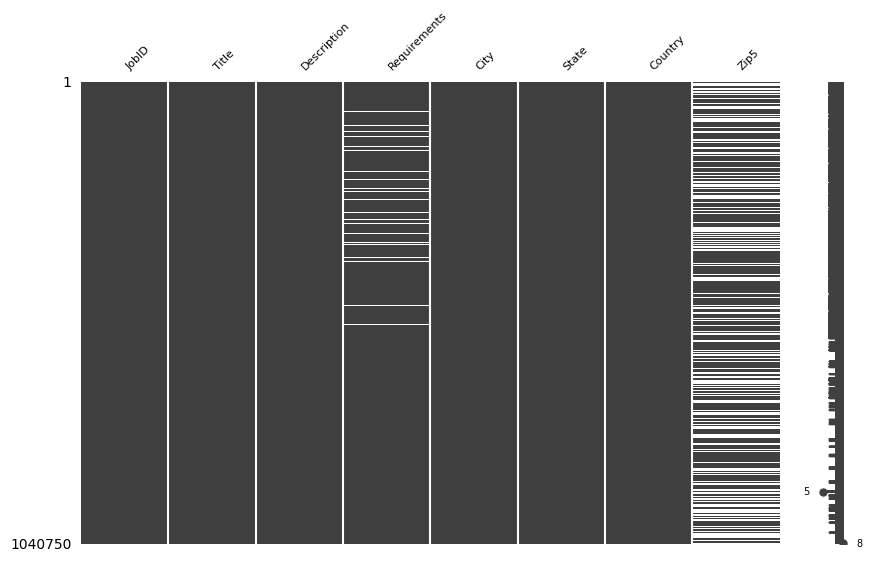

In [12]:
msno.matrix(jobs_df, fontsize=8, figsize=(10, 6))

<AxesSubplot:>

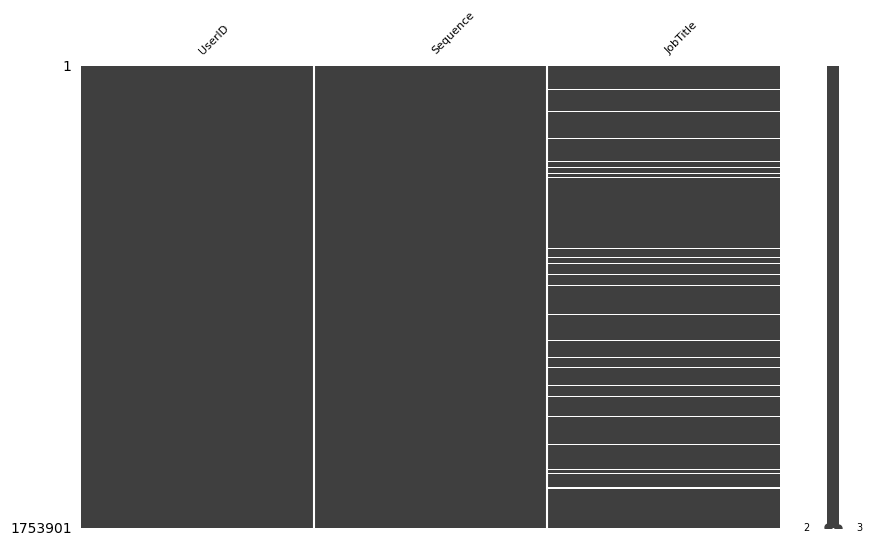

In [13]:
msno.matrix(users_history_df, fontsize=8, figsize=(10, 6))

The number of missing values above indicates that our data needs to be cleaned before it can be used in a recommender system.

## Data cleaning
Lets start off with removing columns from the datasets that are not necessary for our implementation. 

In [14]:
# Drop unnecessary columns from the users_df
users_df.drop('ZipCode', inplace=True, axis=1)
users_df.drop('GraduationDate', inplace=True, axis=1)

# Drop unnecessary columns from the jobs_df
jobs_df.drop('Zip5', inplace=True, axis=1)
jobs_df.drop('Requirements', inplace=True, axis=1)

The jobs_df dataset contains some values under the "Country" heading that also need to be dropped.

In [15]:
# Remove all digits from "Country" column
jobs_df = jobs_df[~jobs_df.Country.str.contains(r'\d', na=False)]

Due to the missing values in the datasets, we need to remove some rows with null values. In the users_df, any rows that have missing values for 'CurrentlyEmployed', 'TotalYearsExperience', and 'Major' can be dropped. Furthermore, jobs without a title or location cannot be recommended to users, so they will also be removed from the datasets. Additionally, if there is no job title in the users_history-df, these entries are also removed.

In [16]:
# Remove rows with null values where null values should not be
users_df = users_df.dropna(axis=0, subset=['CurrentlyEmployed', 'TotalYearsExperience', 'Major'])
jobs_df = jobs_df.dropna(axis=0, subset=['Title', 'City', 'State'])
users_history_df = users_history_df.dropna(axis=0, subset=['JobTitle'])

The recommender system will use job descriptions, job titles, and locations to make recommendations to users. As a result, we must ensure that the descriptions for each job contain sufficient information. To ensure no null values are present, we add the job title to the description field.

In [17]:
# Add the title to the job description
jobs_df['Description'] = jobs_df['Description'].fillna('')
jobs_df['Description'] = jobs_df['Title'] + ": " + jobs_df['Description']

Convert some columns to different types:

In [18]:
users_df['TotalYearsExperience'] = users_df['TotalYearsExperience'].astype(dtype='int')

There are 59 countries included in the jobs_df, including:

In [19]:
# See the number of unique countries listed for the job openings:
print(jobs_df.Country.value_counts())
print("Num countries: " + str(jobs_df['Country'].nunique()))
percentage_US = len(jobs_df[(jobs_df['Country'] == 'US')])/len(jobs_df)*100

US    1039396
AF        522
CZ        177
MX         87
AU         76
AT         75
TR         58
HU         41
RU         40
SK         33
ZA         32
JP         25
BR         23
MT         14
LU         10
HR          8
BT          8
FI          7
PH          6
BJ          6
DJ          6
LT          5
CL          5
HK          5
UM          4
BG          4
UY          4
KR          4
PA          4
PE          3
GE          3
GI          3
NZ          3
KE          2
ID          2
UZ          2
AO          2
TW          2
UA          2
ZW          2
VN          2
SI          2
TT          1
EH          1
VA          1
CR          1
LV          1
BM          1
UG          1
EE          1
CO          1
AW          1
BS          1
DZ          1
PK          1
TL          1
FX          1
SR          1
NG          1
Name: Country, dtype: int64
Num countries: 59


Percentage US: 99.8713409273254


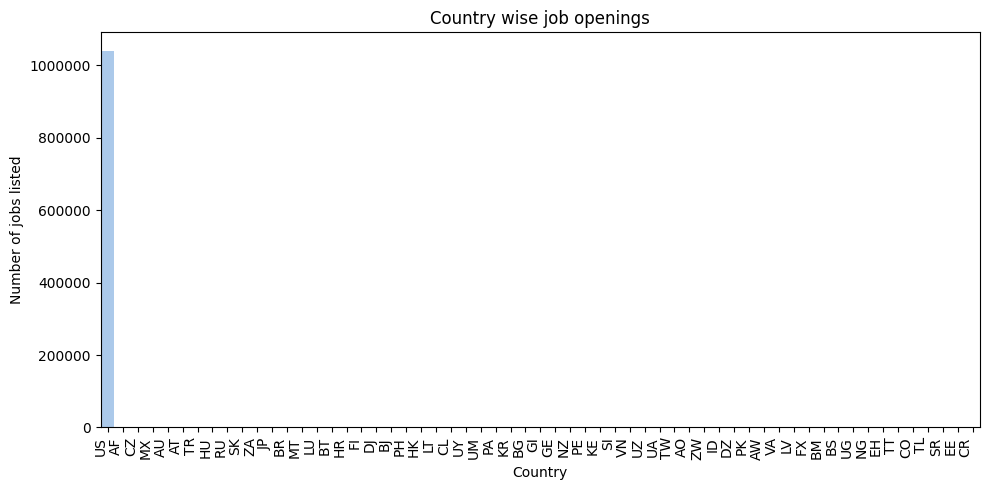

In [20]:

print(f"Percentage US: {percentage_US}")

# Barplot of how many entries we have per country
countries_df = jobs_df.groupby(['Country']).size().reset_index(name='location').sort_values('location', ascending=False)
plt.figure(figsize=(10,5))
ax = sns.barplot(x="Country", y="location", data=countries_df, palette="pastel")
ax.set(xlabel="Country", ylabel="Number of jobs listed")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.set_title('Country wise job openings')
ax.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()


Approximately 99.87 percent of the job entries are listed in the United States, so we will filter the dataset to only include job openings and job seekers in the United States:

In [21]:
# Only look at jobs and users from the US
jobs_df = jobs_df.loc[jobs_df['Country'] == "US"]
users_df = users_df.loc[users_df['Country'] == "US"]

# Drop the "Country" column as it is unnecessary
users_df.drop('Country', inplace=True, axis=1)
jobs_df.drop('Country', inplace=True, axis=1)

If we look at some of the values for the number of years of work experience, we can see that some people have stated they have more than 100 years of experience (which is very likely incorrect). If we go off the assumption that a user can only start working in the US at the age of 14 years old [[9]](#references) and the retirement age of a US citizen is 66 [[10]](#references) years old, then the maximum number of years a user can work is 52 (66-14). The users dataframe is then filtered to include only users with 52 years or less of work experience.
Let us take a look at entry 6279 as an example:

In [22]:
users_df.loc[users_df['UserID'] == 6279]

,UserID,City,State,DegreeType,Major,WorkHistoryCount,TotalYearsExperience,CurrentlyEmployed,ManagedOthers,ManagedHowMany
266,6279,Fredericksburg,VA,Bachelor's,History and Social Sciences,8,112,Yes,Yes,50


It is very unlikely that user 6279 has 112 years of work experience. Therefore, we should eliminate users with more than 52 years of work experience.

In [23]:
# Remove users with more than 52 years of work experience 
users_df = users_df.loc[users_df['TotalYearsExperience'] <= 52]

It is also important to ensure that the datasets do not contain duplicate entries:

In [24]:
print("Number of duplicate user ids in users_df: " + str(users_df.duplicated(subset='UserID').sum()))
print("Number of duplicate job ids in jobs_df: " + str(jobs_df.duplicated(subset='JobID').sum()))
print("Number of duplicate job and user ids in users_history_df: " + str(users_history_df.duplicated(subset=['JobTitle', 'UserID', 'Sequence']).sum()))

Number of duplicate user ids in users_df: 0
Number of duplicate job ids in jobs_df: 0
Number of duplicate job and user ids in users_history_df: 0


Let's examine the information contained in the description column for the first job entry.

In [25]:
jobs_df['Description'].iat[0]

'Security Engineer/Technical Lead: <p>Security Clearance Required:&nbsp; Top Secret </p>\\r<p>Job Number: TMR-447</p>\\r<p>Location of Job:&nbsp; Washington, DC</p>\\r<p>TMR, Inc. is an Equal Employment Opportunity Company</p>\\r<p>For more job opportunities with TMR, visit our website <a href="http://www.tmrhq.com/">www.tmrhq.com</a></p>\\r<p>Send Resumes to HR@tmrhq2.com</p>\\r<p>&nbsp;</p>\\r<p>JOB SUMMARY:</p>\\r<p>&nbsp;</p>\\r<p>Leads the customer&rsquo;s overall Cyber Security strategy, formalizes service offerings consisted with ITIL best practices, and provides design and architecture support.</p>\\r<p>&nbsp;</p>\\r<ul>\\r    <li>Provide security design / architecture support for OJP&rsquo;s IT Security Division (ITSD) </li>\\r    <li>Leads the SECOPS team in the day to day OJP Security Operations support&nbsp; </li>\\r    <li>Provides direction when needed in a security incident or technical issues </li>\\r    <li>Works in concert with network operations on design /integratio

It can be seen in the description above that job descriptions may include HTML elements. In order to ensure that these elements have no impact on the job recommender system, we remove all HTML elements and unnecessary punctuation marks from the Descriptions column. 

In [26]:
def clean_html(description):

    # Get rid of all <> tags
    new_description = re.sub('<[^<]+?>', '', description)

    # A list of all elements that must be taken out of the descriptions
    char_none_remove = ["&nbsp;", "\n", ",", ";", ".", "&"]
    char_space_remove = ["\\r", "(", ")", ",", ":", "-", "/"]

    for char in char_none_remove:
        new_description = new_description.replace(char, "")
    for char in char_space_remove:
        new_description = new_description.replace(char, " ")
    
    # Removing all 
    new_description = " ".join(new_description.split())
    return new_description.lower()

jobs_df['Description'] = jobs_df['Description'].astype(dtype='str').apply(clean_html)
jobs_df['Description'].iat[0]

'security engineer technical lead security clearance required top secret job number tmr 447 location of job washington dc tmr inc is an equal employment opportunity company for more job opportunities with tmr visit our website wwwtmrhqcom send resumes to hr@tmrhq2com job summary leads the customerrsquos overall cyber security strategy formalizes service offerings consisted with itil best practices and provides design and architecture support provide security design architecture support for ojprsquos it security division itsd leads the secops team in the day to day ojp security operations support provides direction when needed in a security incident or technical issues works in concert with network operations on design integration for best security posture supports business development functions including capture management proposal development and responses and other initiatives to include conferences trade shows webinars developing white papers and the like identifies resources and me

To conclude the data cleaning process, let's ensure that there are no missing values.

In [27]:
users_df.isna().sum()

UserID                  0
City                    0
State                   0
DegreeType              0
Major                   0
WorkHistoryCount        0
TotalYearsExperience    0
CurrentlyEmployed       0
ManagedOthers           0
ManagedHowMany          0
dtype: int64

In [28]:
jobs_df.isna().sum()

JobID          0
Title          0
Description    0
City           0
State          0
dtype: int64

In [29]:
users_history_df.isna().sum()

UserID      0
Sequence    0
JobTitle    0
dtype: int64

# Exploratory Data Analysis
Let's look at job openings and job seekers in the United States based on the jobs_df dataframe and users_df dataframe, respectively.

## States in the US

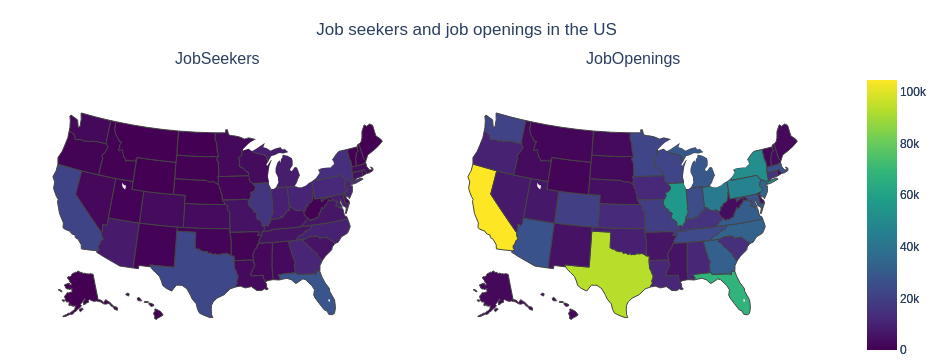

In [30]:
# Get datasets of the states for job seekers and job openings
statewise_users = users_df.groupby('State').size().reset_index(name='Statewise').sort_values('Statewise',ascending=False)
statewise_jobs = jobs_df.groupby(['State']).size().reset_index(name = 'Statewise').sort_values('Statewise', ascending = False)
statewise_users = statewise_users.loc[statewise_users['Statewise'] >= 1]
statewise_jobs = statewise_jobs.loc[statewise_jobs['Statewise'] >= 1]

# Merge the state users and state jobs to form a Choropleth map
mereged_state_wise = statewise_users.copy()
mereged_state_wise.rename(columns = {'Statewise':'JobSeekers'}, inplace = True)
mereged_state_wise = pd.merge(mereged_state_wise,statewise_jobs)
mereged_state_wise.rename(columns = {'Statewise':'JobOpenings'}, inplace = True)

min_scale = min(min(mereged_state_wise['JobOpenings']), min(mereged_state_wise['JobSeekers']))
max_scale = max(max(mereged_state_wise['JobOpenings']), max(mereged_state_wise['JobSeekers']))

titles = [mereged_state_wise.columns[1], mereged_state_wise.columns[2]]
rows = 1
cols = 2

colour = "viridis"

fig = make_subplots(
    rows=rows, cols=cols, 
    specs = [[{'type': 'choropleth'} for c in np.arange(cols)] for r in np.arange(rows)],
    subplot_titles = titles, vertical_spacing=0.1, horizontal_spacing=0
)

fig.add_trace(go.Choropleth(locations=mereged_state_wise['State'], z = mereged_state_wise['JobSeekers'],
locationmode = 'USA-states', zmin=min_scale, zmax=max_scale, colorscale=colour), row = 0//cols+1, col = 0%cols+1)

fig.add_trace(go.Choropleth(locations=mereged_state_wise['State'], z = mereged_state_wise['JobOpenings'],
locationmode = 'USA-states', zmin=min_scale, zmax=max_scale, colorscale=colour), row = 1//cols+1, col = 1%cols+1)

fig.update_layout(title={'text':'Job seekers and job openings in the US', 'xanchor': 'center','x':0.5},
 **{'geo' + str(i) + '_scope': 'usa' for i in [''] + np.arange(2,rows*cols+1).tolist()},
 coloraxis_showscale=True, margin={"r":10,"t":70,"l":10,"b":0},
 hoverlabel=dict(bgcolor='#e6e6e6', font_size=12, font_family="Rockwell"))
fig.update_traces(showscale=True)
fig.show()

It surprised me that there is such a big difference between job openings and job seekers in the US. When analyzing the two states with the highest number of job openings (California and Texas), there are 109630 and 98071 job openings respectively, and there are only 21645 and 23014 job seekers in each state respectively. Based on these statistics, California has 5 jobs available per person and Texas has 4.26 jobs available per person.

According to the ["Job Openings and Labor Turnover Survey"](https://www.bls.gov/news.release/jolts.nr0.htm), there were 11.27 million job openings in February 2022 and 6.5 million unemployed people in the US. Therefore, there were 4.77 million more openings than available workers, or 1.73 jobs per unemployed person [[3]](#references).

After conducting further research, I found an article titled ["U.S. job openings remain high, with nearly twice as many openings as unemployed workers"](https://www.pbs.org/newshour/economy/u-s-job-openings-remain-high-with-nearly-twice-as-many-openings-as-unemployed-people#:~:text=Twitter-). This article explained that, as a result of historic levels of open jobs and people quitting their jobs, employers have been forced to pay more to attract and retain workers, resulting in solid wage increases for many Americans, especially those who change careers. As a consequence of higher salaries, most companies then raised their prices in order to recoup some of the additional labor costs, contributing to inflation pressures, which Americans increasingly see as their most pressing national concern [[4]](#references).




## Cities in the US

In [31]:
top_n_cities = 20

With a better understanding of each state's job market, let's examine the top 20 cities in the U.S. with the most job openings.

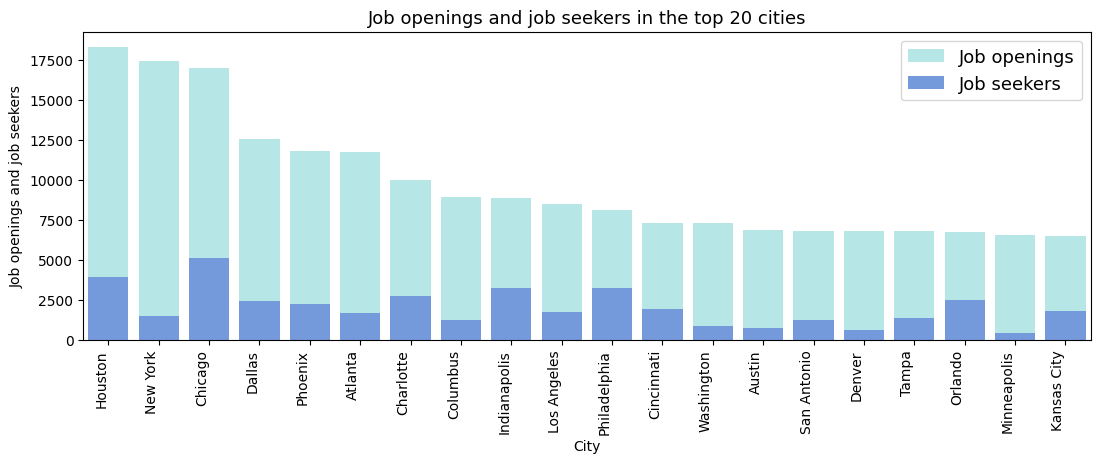

In [32]:
citywise_jobs = jobs_df.groupby(['City']).size().reset_index(name='CitywiseJobs')
citywise_users = users_df.groupby(['City']).size().reset_index(name='CitywiseUsers')
city_df = pd.merge(citywise_jobs, citywise_users, on='City', how='outer').sort_values('CitywiseJobs', ascending=False)
city_df = city_df.dropna()

figure = plt.figure(figsize=(13,4))

ax = figure.subplots()
 
# Plotting columns
ax = sns.barplot(x="City", y="CitywiseJobs",data=city_df.head(top_n_cities), color='paleturquoise', label="Job openings")
ax = sns.barplot(x="City", y="CitywiseUsers",data=city_df.head(top_n_cities), color='cornflowerblue', label="Job seekers")
 
# Renaming the axes
ax.set(xlabel="City", ylabel="Job openings and job seekers")
ax.set_title("Job openings and job seekers in the top 20 cities", fontsize='13')
ax.legend(loc='upper right', fontsize='13')
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=90, ha='right')
# Visualizing illustration
plt.show()

In [33]:
print(citywise_jobs.loc[citywise_jobs['City'] == "New York"]["CitywiseJobs"].tolist()[0])
print(citywise_users.loc[citywise_users['City'] == "New York"]["CitywiseUsers"].tolist()[0])

17442
1473


<!-- In Houston, for example, there are 18 326 job openings but only 3 952 people seeking employment (4.64 jobs per person). New York has 17442 job openings, but only 1475 people are looking for employment (11.83 jobs per person). -->
New York has 17442 job openings, but only 1475 people are looking for employment (11.83 jobs per person). My first impression of this statement was "Great! New York is a great place to find a job, so let's move there.", however this is not the case. There is a general warning to overseas applicants: unless you have been assigned to New York on an expat assignment, or you are a recognized specialist in your field, getting a job in NYC can be very challenging. This can be attributed to the fact that applying for a visa for an employee from abroad can be a very time-consuming and costly process for employers. Another reason could be that finding accommodation in New York can be just as difficult as finding a job [[5]](#references).

## Different users
Let's take a closer look at the different types of users and their attributes. 

### Degree types and majors:
In total, there are 7 types of degrees in our dataset, one of them being 'None'. Let us take a look at how many people hold each type of degree.

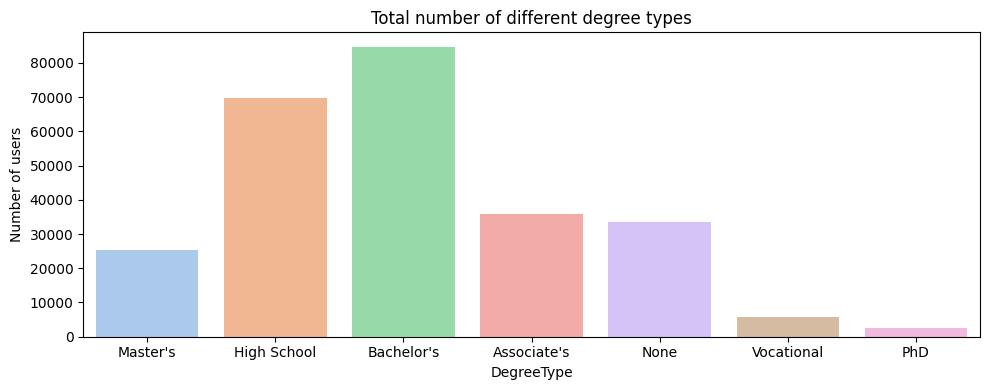

In [34]:
# Plotting total number of degree types
plt.figure(figsize=(10,4))
ax = sns.countplot(x='DegreeType', data=users_df,palette=colors)
ax.set_xticklabels(ax.get_xticklabels())
ax.set_title('Total number of different degree types')
plt.ylabel("Number of users")
plt.tight_layout()
plt.show()


The above graph shows the total number of different degrees. We will now filter the results by state. Choose a state and see how many degrees are in that state.

In [35]:
# Dropdown menu to filter by state
def dropdown_menu(State="CA"):
    per_state_df =users_df.query("State == @State")
    plt.figure(figsize=(10,4))
    ax = sns.countplot(x='DegreeType', data=per_state_df,palette=colors)
    ax.set_xticklabels(ax.get_xticklabels())
    ax.set_title(f'Number of degrees in state {State}')
    plt.ylabel("Total number of users")
    plt.xlabel("Degree type")
    plt.tight_layout()
    plt.show()

states_list = users_df['State'].unique().tolist()
widgets.interact(dropdown_menu, State=states_list)

interactive(children=(Dropdown(description='State', options=('CA', 'NJ', 'NY', 'LA', 'SC', 'VT', 'VA', 'MO', '…

<function __main__.dropdown_menu(State='CA')>

Now lets take a look at the top 10 majors:

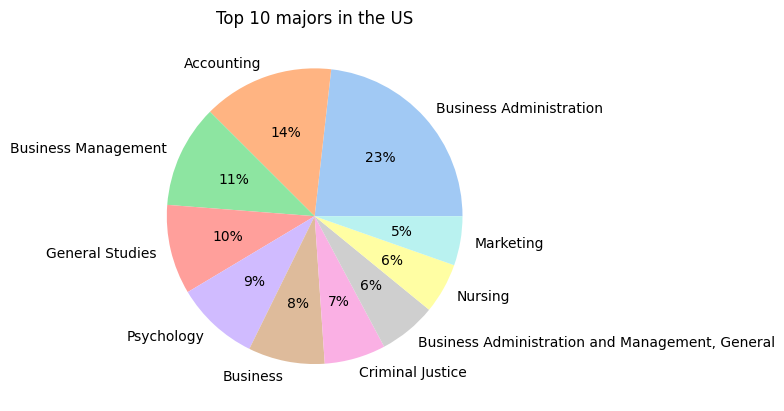

In [36]:
# Plotting top 10 majors
majors_df = users_df.groupby('Major').size().reset_index(name='Majors').sort_values('Majors',ascending=False)[1:11]
majors_df = majors_df.query("Majors >= 10")
data = majors_df['Majors']
majors_labels = majors_df['Major']
plt.pie(data, labels = majors_labels, colors = colors, autopct='%.0f%%')
plt.title("Top 10 majors in the US")
plt.show()


### Work experience

The number of years of work experience of the users can also be examined.

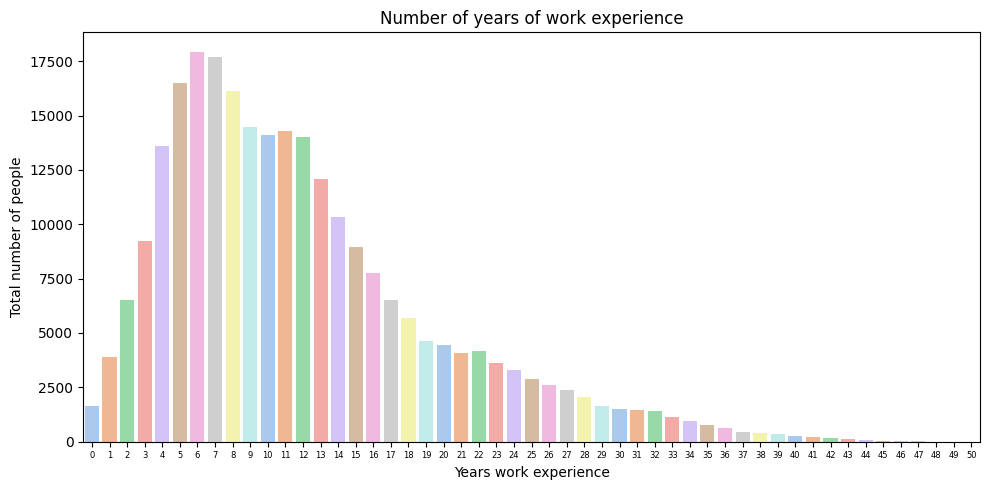

In [37]:
# Plotting the total amount of work experience
min_experience_df = users_df.copy()
min_experience_df = min_experience_df.dropna(axis=0, subset=['TotalYearsExperience'])
min_experience_df['TotalYearsExperience'] = min_experience_df['TotalYearsExperience'].astype(dtype='int')
exper = max(min_experience_df['TotalYearsExperience'])
min_experience_df = min_experience_df.query("TotalYearsExperience <= 52")
plt.figure(figsize=(10,5))
ax = sns.countplot(x='TotalYearsExperience', data=min_experience_df,palette=colors)
ax.set_xticklabels(ax.get_xticklabels())
ax.set_title('Number of years of work experience')
plt.ylabel("Total number of people")
plt.xlabel("Years work experience")
plt.xticks( fontsize=6) # Rotates X-Axis Ticks by 45-degrees
plt.tight_layout()
plt.show()


Now that we have a better understanding of the data, let's implement the recommender system.

# Implementation

Steps to implement the job recommender:
1.	Bag-of-words
2.	Feature vector
3.	Dimensionality Reduction
4.  Similarity scores
5.	Get recommendations 

The first step in the implementation is to create a 'bag-of-words' model from the input data, which represents a list of words used to describe the different jobs. The purpose of this step is to select useful content that can be used to describe and differentiate the items. In order to make the best recommendations, the information should be as precise as possible. The next step is to convert the bag (of words) into a feature vector. This step can be performed using a variety of algorithms, such as, the Tfdif vectorizer or the count vectorizer. This results in a vector matrix in which items represent records and features represent columns. Next, the more important features will be filtered from our feature vector using reducing dimensionality techniques. In step 4, we calculate the similarities between the different jobs. Content-based recommendations are based on the measurement of item similarity so pairwise comparisons are used to assign similarity scores. A number of different measures can be chosen, such as the dot product or cosine similarity. The final step is to make recommendations. In order to recommend jobs to users, we will sort the data by similarity scores and return the top $n$ most similar jobs.

<center><figure>
        <img src="./assets/step.png" style="height: 550px; width:1150px; align=center">
        <figcaption style="text-align: center;">5 Steps in our job recommendation implementation</figcaption>
    </figure></center>




## 1. Creating a Bag-of-Words Model

The first step is to create the bag-of-words model. As mentioned, a bag-of-words consists of a set of words that describe and differentiate items within a dataset. Creating a bag-of-words eliminates stopwords but preserves multiplicity so that words can be repeated multiple times. Each word can then be used as a cosine similarity feature. Input for a bag-of-words is not necessarily drawn from a single column. We will use job titles, descriptions, cities, and states and merge them into a new single column that we call tags. It is also important to capture the text field’s nature. The result of this process is our bag.

In [38]:
# Create tags for the bag
first_few_jobs = jobs_df.iloc[:5000]
first_few_jobs['tags'] = first_few_jobs['Title'] + ' ' + first_few_jobs['Description'] + ' ' + first_few_jobs['City'] + ' ' + first_few_jobs['State']

# Drop records with empty tags and dublicates
first_few_jobs.drop(first_few_jobs[first_few_jobs['tags']==''].index, inplace=True)
first_few_jobs.drop_duplicates(inplace=True)

# Add a fresh index to the dataframe, which we will later use when refering to items in the vector matrix
first_few_jobs['new_id'] = range(0, len(first_few_jobs))

# Create an empty DataFrame and extract the relevant columns
bag_df = pd.DataFrame()
bag_df = first_few_jobs[['new_id', 'JobID', 'Title', 'tags', 'City', 'State']]
first_few_jobs.drop('tags', inplace=True, axis=1)

# Display the data
pd.set_option('display.max_colwidth', 500)
pd.set_option('display.expand_frame_repr', False)
bag_df.head(2)

,new_id,JobID,Title,tags,City,State
0,0,1,Security Engineer/Technical Lead,Security Engineer/Technical Lead security engineer technical lead security clearance required top secret job number tmr 447 location of job washington dc tmr inc is an equal employment opportunity company for more job opportunities with tmr visit our website wwwtmrhqcom send resumes to hr@tmrhq2com job summary leads the customerrsquos overall cyber security strategy formalizes service offerings consisted with itil best practices and provides design and architecture support provide security d...,Washington,DC
1,1,4,SAP Business Analyst / WM,"SAP Business Analyst / WM sap business analyst wm no corp to corp resumesare being considered for this ldquodirect hire"" permanent position h 1b transfers are available for qualified candidates with 5+ years of wm experience sap wm warehouse management sr business analyst positionrsquos location is the charlotte nc metro area we are currently seeking a senior sap business analyst with a minimum of 5 years of sap wm warehouse management experience for a ""direct hire opportunity"" in the charlo...",Charlotte,NC


### Visualizing the text length:

A bar chart can be used to illustrate the length of each jobs tag. This gives us a sense of the level of detail in the job descriptions. Short descriptions have a lower probability of being recommended in the future. When the length of the descriptions is somewhat balanced, recommenders produce better results.

(0.0, 9778.0)

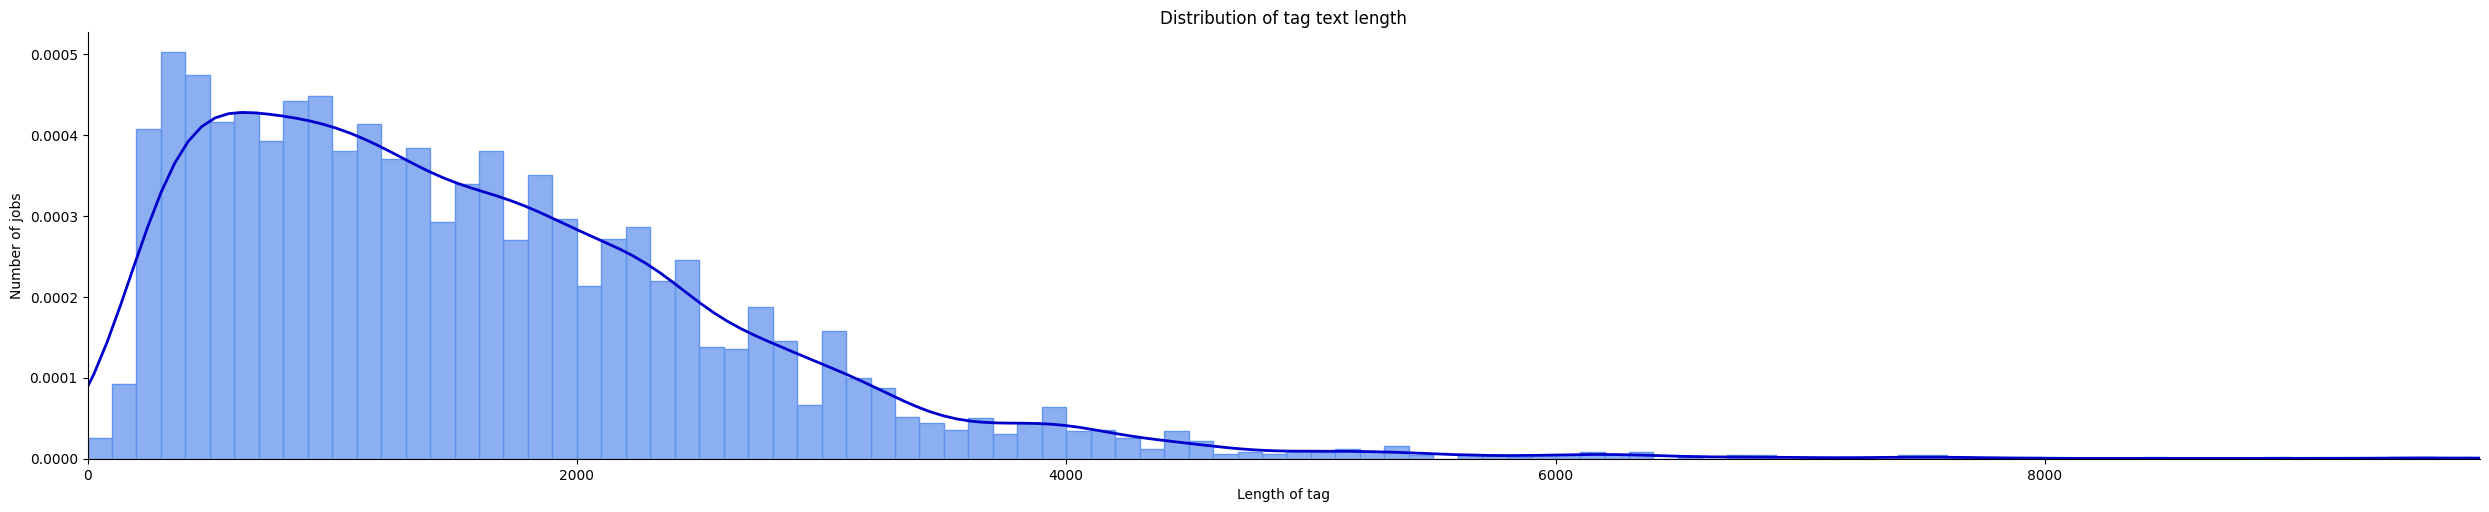

In [39]:
# Add the tag length to the jobs df
bag_df['tag_len'] = bag_df['tags'].apply(lambda x: len(x))
bag_df = bag_df.dropna()

# Illustrate the tag text length
ax = sns.displot(data=bag_df, bins=list(range(0, 10000, 100)), height=5, x='tag_len', aspect=5, kde=False, stat='density', color='cornflowerblue', edgecolor='cornflowerblue')
sns.kdeplot(data=bag_df, x="tag_len", color='mediumblue', ax=ax, linewidth=2)
plt.title('Distribution of tag text length')
plt.xlabel('Length of tag')
plt.ylabel('Number of jobs')
plt.xlim([0, max(bag_df['tag_len'])])

## 2. Feature vector: Vectorization using TfidfVectorizer

The next step is to construct a vector matrix based on the bag-of-words model. The columns of the matrix represent word features. Before the vectorization, we create a list of stop words to be removed from the text (e.g., and, are, on, it, that, or, why, where, etc.). 

In [40]:
# Set a custom stop list using the nltk package
stop = list(stopwords.words('english'))

# Display some of the stop words
print("Number of stopwords: " + str(len(stop)))
stop[100:105]

Number of stopwords: 179


['here', 'there', 'when', 'where', 'why']

A simple vectorization approach involves determining the frequency of words in each job using a count vectorizer. The disadvantage of this approach, however, is that it does not take into account the frequency of occurrence of words. For instance, some words may appear in almost every item, while others may be prevalent in a few items but rare in general. We can therefore argue that observing rare words in an item is more informative than observing common words. As an alternative to a count vectorizer, we will use a more practical method called TfidfVectorizer from the [sklearn.decomposition](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition) package.
The TF-IDF representation is a specific implementation of a bag-of-words model, where TF stands for Term Frequency and IDF stands for Inverse Document Frequency. Using this model, we can determine how important a word is within a document (local significance) as well as how important it is within the corpus (global significance) [[6]](#references).  

<br/><br/>

**Term Frequency:**

Term frequency is defined as the number of times a word appears in a document ($i$) divided by the total number of words in the document ($j$).

$$ t f_{i,j} = {n_{i,j} \over \sum_{k} n_{i, j} }$$

**Inverse Document Frequency:**

The inverse document frequency is calculated as the log of the total number of documents ($N$) divided by the number of documents containing the word $(df_t)$. It is necessary to add a logarithm to dampen the significance of high values of IDF.

$$ idf(w) = log {N \over df_t }$$

**TF-IDF:**

The TF-IDF is therefore computed by multiplying the term frequency by the inverse document frequency.

$$ 
\begin{aligned}
w_{i, j} &= t f_{i,j} \times idf(w)  \\
     &= {n_{i,j} \over \sum_{k} n_{i, j} } \times log {N \over df_t }  \\
\end{aligned}
$$


### TfidfVectorizer parameters:
- **max_features:** Instead of using all words as features, this parameter enables only the $n$ most frequent words to be considered. To reduce the training time, I decided to limit the number of features in the matrix to 7000.
- **stop_words:** Using this parameter, you can eliminate extremely common words. We have set the parameter to a list of built-in English words. 
- **analyzer:** This parameter specifies whether the feature should be based on word n-grams or character n-grams. We have set it to use word n-grams. 


In [41]:
# Create the tfid vectorizer
tfidf =  TfidfVectorizer(max_features=7000, analyzer = 'word', stop_words=set(stop))
tfidf

TfidfVectorizer(max_features=7000,
                stop_words={'a', 'about', 'above', 'after', 'again', 'against',
                            'ain', 'all', 'am', 'an', 'and', 'any', 'are',
                            'aren', "aren't", 'as', 'at', 'be', 'because',
                            'been', 'before', 'being', 'below', 'between',
                            'both', 'but', 'by', 'can', 'couldn', "couldn't", ...})

In [42]:
# Create the feature vector
vectorized_data = tfidf.fit_transform(bag_df['tags'])
feature_vector = pd.DataFrame(vectorized_data.toarray(), index=bag_df['tags'].index.tolist())
print(feature_vector)

      0     1     2     3     4     5     6     7     8     9     ...  6990  6991  6992  6993  6994  6995  6996  6997  6998  6999
0      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
1      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
2      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
3      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
4      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...
4998   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   

Using the vectorizer's *get_feature_names_out* function, we can display some of the feature names.

In [43]:
print(tfidf.get_feature_names_out()[2000:2010])

['dispute' 'disputes' 'distance' 'distinguish' 'distribute' 'distributed'
 'distributes' 'distributing' 'distribution' 'distributor']


## 3. Dimensionality Reduction using SVD

In this feature matrix, there are 7000 column features spanning a high-dimensional vector space. Are all of these features necessary? There is a high probability that the answer is no. It is likely that there are a number of words that appear only once or twice in the matrix. On the other hand, some words may be present in almost every job description. This is why we use dimensionality reduction. 


By reducing this space to only a few, more essential features, we will be able to save some time in training our recommender model. We will make use of a popular algorithm for reducing dimensionality known as TruncatedSVD from the [scikit-learn](https://scikit-learn.org/stable/) package. By smoothing the matrix and reducing the dimension of the space, the algorithm reduces the amount of noise and the complexity of the model. We have chosen to reduce the vector space from 7000 to 3000 features.


In [44]:
# Dimension reduction using SVD
svd = TruncatedSVD(n_components=3000)
reduced_jobs = svd.fit_transform(feature_vector)

## 4. Similarity scores using Cosine Similarities

After reducing the complexity of our vector matrix, we can calculate similarity scores for all of the jobs. This process involves assigning a similarity score to all item pairs that are based on the position of the items in the vector space.
The similarity value of the jobs is calculated using the cosine function from the [sklearn.metrics.pairwise](https://scikit-learn.org/stable/modules/metrics.html) package. This calculation determines the mathematical similarity of two vectors based on their cosine similarity. Using the feature vectors, the cosine similarity function compares each job with each other and assigns a similarity score to each.

$$
\begin{aligned}
similarity(A, B) &= {A . B  \over  || A || \times || B || }  \\
     &= {\sum_{i=1}^{n} \left( A_{i} \times B_{i} \right) \over \sqrt{\sum_{i=1}^{n} A_{i}^{2}}  \times \sqrt{\sum_{i=1}^{n} B_{i}^{2}}  } 
\end{aligned}
$$

A cosine measure is used to determine whether two embeddings are pointing in the same direction or not. When the embeddings are pointing in the same direction, the angle between them is zero, therefore their cosine similarity is 1. The cosine similarity is zero when the embeddings are perpendicular to each other and the angle between them is 90 degrees. Finally, if the angle between them is 180 degrees, the cosine similarity is -1. Therefore, a cosine similarity of 1 indicates that the jobs are identical, whereas a cosine similarity of -1 indicates that the jobs are completely different. 


In [45]:
# Compute the cosine similarity matrix
similarity = cosine_similarity(reduced_jobs)
similarity

array([[ 1.00000000e+00,  8.07476487e-02,  4.05853806e-02, ...,
         4.57538981e-02, -1.79205583e-04,  2.28204600e-03],
       [ 8.07476487e-02,  1.00000000e+00,  1.03329064e-02, ...,
         5.20741486e-02,  2.75021908e-03,  3.84262946e-02],
       [ 4.05853806e-02,  1.03329064e-02,  1.00000000e+00, ...,
         8.14568548e-03,  1.32399437e-02, -5.21251366e-04],
       ...,
       [ 4.57538981e-02,  5.20741486e-02,  8.14568548e-03, ...,
         1.00000000e+00,  4.96886995e-02,  2.97924010e-01],
       [-1.79205583e-04,  2.75021908e-03,  1.32399437e-02, ...,
         4.96886995e-02,  1.00000000e+00,  2.67243803e-01],
       [ 2.28204600e-03,  3.84262946e-02, -5.21251366e-04, ...,
         2.97924010e-01,  2.67243803e-01,  1.00000000e+00]])

## 5. Generating job recommendations 

The next step is to generate some recommendations based on the similarity matrix that we have created. Our first step is to generate recommendations based on a single job. The jobs with the highest similarity scores in the cosine similarity matrix are the most similar.

In [46]:
# Create a function that takes in job title as input and returns a list of the most similar jobs
def get_recommendations(title, n, bag_df, similarity):

    # Set cosine similarity
    cosine_sim=similarity

    # get the index of the job that matches the title
    bag_without_title = bag_df.copy()
    job_index = bag_without_title[bag_without_title.Title==title].new_id.values[0]
    # print(len(cosine_sim))
    # get the pairwsie similarity scores of all jobs with that job and sort the jobs based on the similarity scores
    sim_scores_all = sorted(list(enumerate(cosine_sim[job_index])), key=lambda x: x[1], reverse=True)
    
    # checks if recommendations are limited
    if n > 0:
        sim_scores_all = sim_scores_all[1:n+1]
        
    # get the job indices of the top similar jobs
    job_indices = [i[0] for i in sim_scores_all]
    scores = [i[1] for i in sim_scores_all]

    top_name = bag_without_title.iloc[job_indices[0]]['Title']
    
    new_id_list = []
    title_list = []
    city_list = []
    state_list = []
    score_list = []
    for i in range(len(job_indices)):
        new_id_list.append(bag_without_title.iloc[job_indices[i]]['new_id'])
        title_list.append(bag_without_title.iloc[job_indices[i]]['Title'] + " (" + bag_without_title.iloc[job_indices[i]]['City'] + ")")
        city_list.append(bag_without_title.iloc[job_indices[i]]['City'])
        state_list.append(bag_without_title.iloc[job_indices[i]]['State'])
        score_list.append(scores[i])

    top_n_df = pd.DataFrame({'new_id': new_id_list, 'Title': title_list, 'City': city_list, 'State': state_list, 'Score': score_list})
    del new_id_list, title_list, city_list, state_list , score_list
    return top_n_df, sim_scores_all, top_name

We can visualize the results in a bar chart that shows the cosine similarity scores once we have identified the job with the highest score.

In [47]:
# Visualize the results
def show_results(job_name, top_titles_df, number_of_recommendations, city):
    fix, ax = plt.subplots(figsize=(14, 4))
    sns.barplot(data=top_titles_df, y='Title', x= 'Score', color='blue', palette="pastel")
    plt.xlim((0,1))
    plt.title(f'Top {number_of_recommendations} recommendations for {job_name}  ({city})')
    pct_values = ['{:.4}'.format(elm) for elm in list(top_titles_df['Score'])]
    pct_values = pct_values[:-1]
    ax.bar_label(container=ax.containers[0], labels=pct_values, size=12)
    return top_titles_df

In [48]:
# Calling get_recommendations and show_results
def show_top_n(job_name, number_of_recommendations, bag_df, similarity):
    city_list = bag_df.loc[bag_df['Title'] == job_name]['City'].tolist()
    state = bag_df.loc[bag_df['Title'] == job_name]['State'].tolist()[0]
    top_titles_df, sim_score_all, top_name = get_recommendations(job_name, number_of_recommendations + 1, bag_df, similarity)
    return show_results(job_name, top_titles_df, number_of_recommendations, city_list[0])


Now lets put it all together. If we want to find the top 10 similar jobs to “SAP Production Planning Consultant” in Ann Arbor, MI, we can use the following:

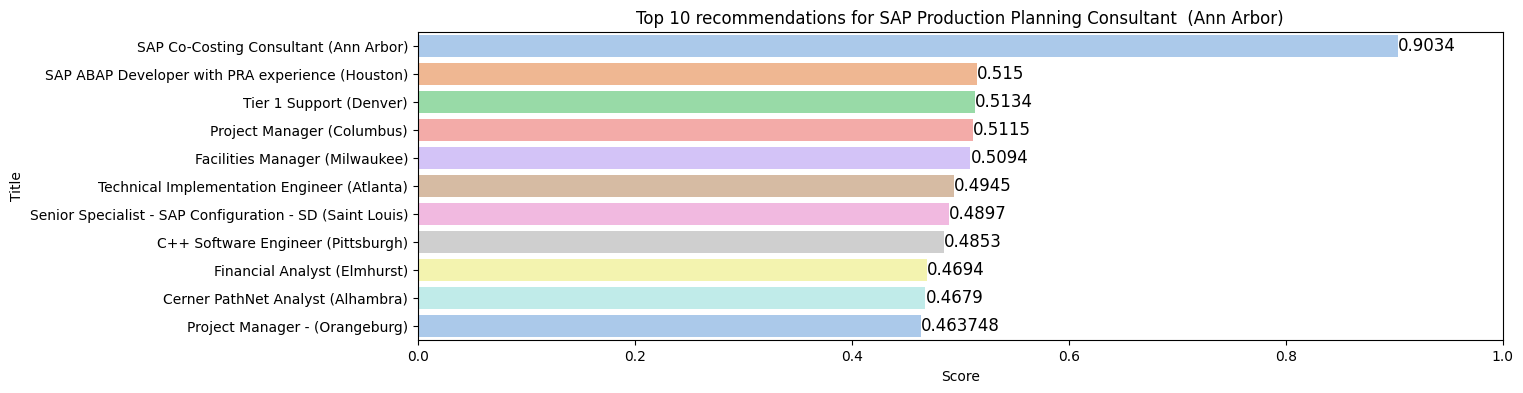

In [49]:
job_title = "SAP Production Planning Consultant"
top_titles_df = show_top_n(job_title, 10, bag_df, similarity)

The top rated similar job to "SAP Production Planning Consultant" is “SAP Co-Costing Consultant” also base in Ann Arbor, MI with a 0.903% similarity score.

Let's take a closer look at both job descriptions and see how similar they are and why this is rated as the top recommended job:

In [50]:
# Comparing the job description with the top-rated recommended job
city = original_jobs_df.loc[original_jobs_df['Title'] == job_title]['City'].tolist()[0]
desc = original_jobs_df.loc[original_jobs_df['Title'] == job_title]['Description'].tolist()[0]

print(job_title + ": ")
print("City: " + city)
print("Description: " + desc)

number_of_recommendations = 1
top_titles_df, sim_score_all, suggested_id = get_recommendations(job_title, number_of_recommendations + 1, bag_df, similarity)

top_titles_df

job_recommended_title = suggested_id
city = original_jobs_df.loc[original_jobs_df['Title'] == job_recommended_title]['City'].tolist()[0]
desc = original_jobs_df.loc[original_jobs_df['Title'] == job_recommended_title]['Description'].tolist()[0]

print()
print(job_recommended_title + ": ")
print("City: " + city)
print("Description: " + desc)

SAP Production Planning Consultant: 
City: Ann Arbor
Description: <b>Responsibilities:</b> Our client is seeking consultants to support a nationwide SAP implementation. The primary function of this role is providing production support for end users during deployment. There will also be some configuration and deployment support at times as well.\r\n\r\nKforce (Nasdaq:KFRC) is a professional staffing and solutions firm providing flexible and permanent staffing solutions in the skill areas of technology, finance & accounting, clinical research and healthcare. Backed by approximately our associates and consultants on assignment, Kforce is committed to "Great People = Great Results" for our valued clients and candidates. Kforce operates with 65 offices located throughout the United States and two offices in the Philippines.\r\n\r\nJob Ref#: 2312~EQG~1138726T1~99

SAP Co-Costing Consultant: 
City: Ann Arbor
Description: <b>Responsibilities:</b> Our client is seeking consultants in Ann Arbor,

As you can see the descriptions are very similar and contain many of the same features. 

Consider another example "Housekeeping" in the state of Orlando:

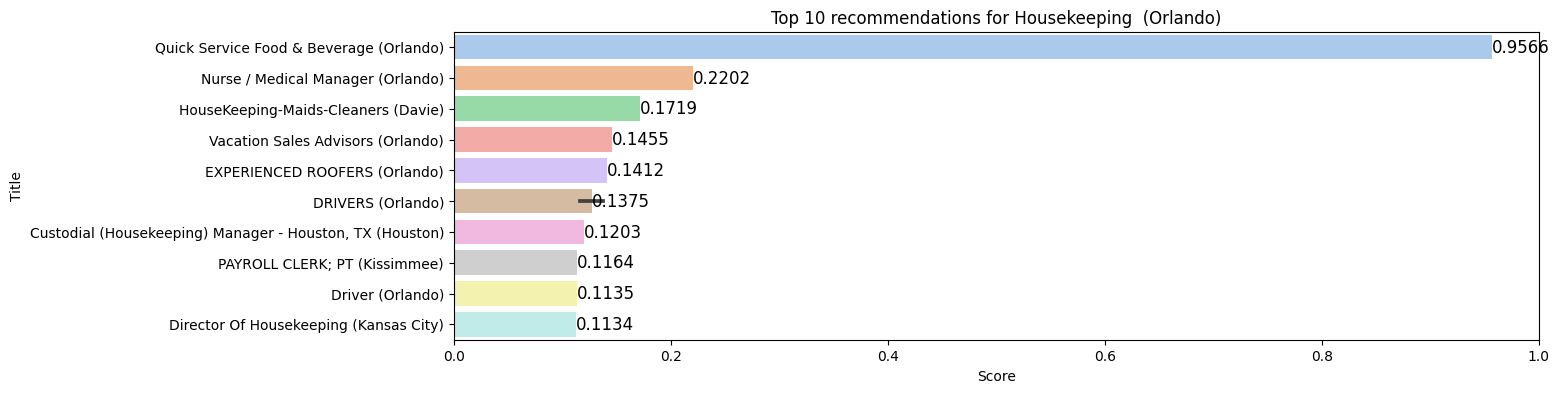

In [51]:
job_title = "Housekeeping"
top_titles_df = show_top_n(job_title, 10, bag_df, similarity)

In [52]:
city = original_jobs_df.loc[original_jobs_df['Title'] == job_title]['City'].tolist()[0]
desc = original_jobs_df.loc[original_jobs_df['Title'] == job_title]['Description'].tolist()[0]

print(job_title + ": ")
print("City: " + city)
print("Description: " + desc)

number_of_recommendations = 1
top_titles_df, sim_score_all, suggested_id = get_recommendations(job_title, number_of_recommendations + 1, bag_df, similarity)

top_titles_df

job_suggested_title = suggested_id
city = original_jobs_df.loc[original_jobs_df['Title'] == job_suggested_title]['City'].tolist()[0]
desc = original_jobs_df.loc[original_jobs_df['Title'] == job_suggested_title]['Description'].tolist()[0]

print()
print(job_suggested_title + ": ")
print("City: " + city)
print("Description: " + desc)

Housekeeping: 
City: Orlando
Description: I make  sure every part of their day is magical. I am Disney. Dreams. That?s what you?ll find at the Walt Disney World? Resort. There are many guest service and entertainment roles in which our cast members bring Disney dreams to life. From our enchanted Theme Parks and world-class Resort Hotels to our spectacular shows and beloved characters, Walt Disney World Resort cast members have a world of opportunity and take pride in turning dreams into realities. Opportunities currently available: Housekeeping ? Bus Drivers ? Custodial Recreation ? Stewards ? Culinary ? Lifeguards Quick Service Food and Beverage Character Look-alike Performers For more information and to apply online, visit WaltDisneyWorld.jobs/NowHiring Apply online today! EOE ? Drawing Creativity from Diversity ? Disney <br><br>Source - Orlando Sentinel

Quick Service Food & Beverage: 
City: Orlando
Description: I love making his day a little sweeter.  I am Disney.  Dreams. That's w

As seen by the bar chart, the top-rated job similar to housekeeping in Orlando is the “Quick Service Food and Beverage” also based in Orlando with a very similar description.

## Job recommendations based on users past experiences:
The above implementation will be repeated, but instead of taking in a job title, we will take in a userID and use previous job titles from user_history to recommend similar jobs.

In [53]:
users_history_df.head(1)

,UserID,Sequence,JobTitle
0,47,1,National Space Communication Programs-Special Program Supervisor


In [54]:
# Drop the sequence number for the user_history_df as its not important otehr tahn to job if the job is a duplicate. 
users_history_df.drop('Sequence', inplace=True, axis=1)

In [55]:
# import random

# # Create a list of available userID's from the users_history_df dataset
users_history_list = users_history_df["UserID"].unique().tolist()

# # Check which users are in the dataset
available_users = users_df["UserID"].unique().tolist()

# Only take ID's that are in both users_df and users_history_df
available_users.extend(users_history_list)


# available_ids = set(i for i in history_list if history_list.count(i) > 1)
# len(available_ids)
# res = [i for i in available_users if i in users_history_list]
userID_list = random.sample(available_users, 20)

x = widgets.Dropdown(options=userID_list)
y = widgets.Dropdown(options=[' - '])

def change_x(*args):
    y.index = None
    y.options=[1, 2, 3]
    
x.observe(change_x, 'value')
widgets.HBox([x])

In [58]:
userID = x.value
print(userID)

1166575


In [59]:
# Create the bag-of-words and add the users past expereince to the bag of words

bag_userID = bag_df.copy()
city = users_df.loc[users_df['UserID'] == userID]['City'].tolist()[0]
state = users_df.loc[users_df['UserID'] == userID]['State'].tolist()[0]
all_past_expereince_titles = users_history_df.loc[users_history_df['UserID'] == userID]
all_past_expereince_titles
experience_list = all_past_expereince_titles["JobTitle"].tolist()
tag = ' '.join(experience_list)
tag = tag + " " + city + " " + state
length_tag = len(tag)

bag_df_add = pd.DataFrame()
bag_df_add = bag_userID.tail(1)
bag_df_add["new_id"] = bag_df_add["new_id"].values[0] + 1
bag_df_add["JobID"] = bag_df_add["JobID"].values[0] + 1
bag_df_add["Title"] = userID
bag_df_add["tags"] = tag
bag_df_add["City"] = city
bag_df_add["State"] = state
bag_df_add["tag_len"] = length_tag
bag_userID = pd.concat([bag_userID, bag_df_add], axis=0)

# Create the tfid vectorizer
tfidf =  TfidfVectorizer(max_features=7000, analyzer = 'word', stop_words=set(stop))

# Create the feature vector
vectorized_data = tfidf.fit_transform(bag_userID['tags'])
feature_vector = pd.DataFrame(vectorized_data.toarray(), index=bag_userID['tags'].index.tolist())

# Dimension reduction using SVD
svd = TruncatedSVD(n_components=3000)
reduced_jobs = svd.fit_transform(feature_vector)

# Compute the cosine similarity matrix
similarity = cosine_similarity(reduced_jobs)

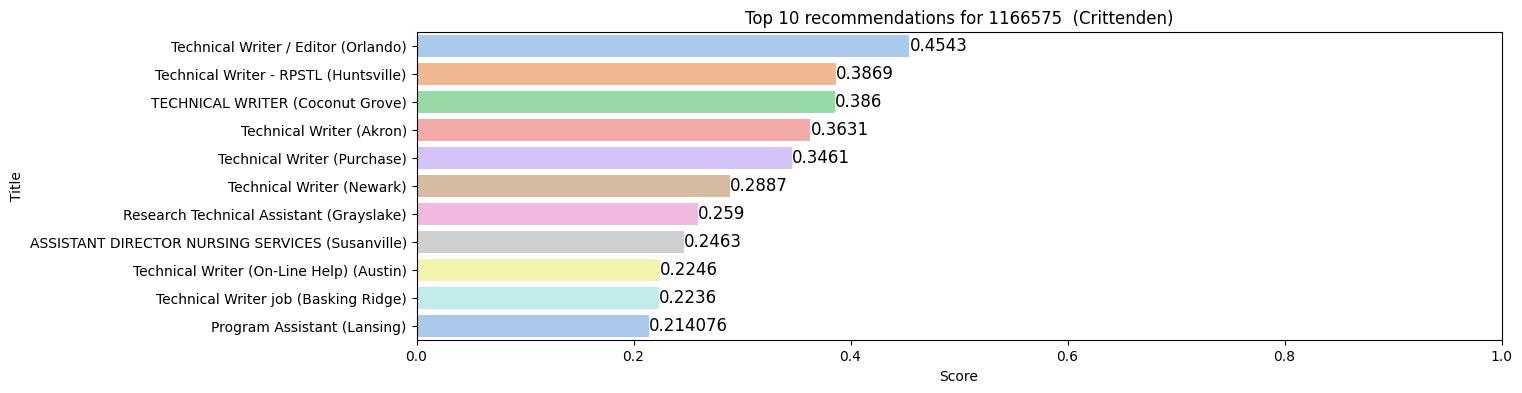

In [60]:
job_title = userID
top_titles_df, sim_score_all, top_name = get_recommendations(userID, number_of_recommendations + 1, bag_userID, similarity)
top_titles_df = show_top_n(job_title, 10, bag_userID, similarity)

In [61]:
print("UserID: " + str(userID))
print("Has worked at the following past jobs:")
print("------------------")
for i in experience_list:
    print(i)


print()
print("Job recommendations for userID: "  + str(userID))
print("------------------")
for i in top_titles_df["Title"].tolist():
    print(i)


UserID: 1166575
Has worked at the following past jobs:
------------------
Scientific Copy Editor
Freelance Writer
Advertising Sales Director
Technical Writer
Research Assistant
Laboratory Assistant
Customer Service Representative

Job recommendations for userID: 1166575
------------------
Technical Writer / Editor (Orlando)
Technical Writer - RPSTL (Huntsville)
TECHNICAL WRITER (Coconut Grove)
Technical Writer (Akron)
Technical Writer (Purchase)
Technical Writer (Newark)
Research Technical Assistant (Grayslake)
ASSISTANT DIRECTOR NURSING SERVICES (Susanville)
Technical Writer (On-Line Help) (Austin)
Technical Writer job (Basking Ridge)
Program Assistant (Lansing)


The below code saves a sample of the cleaned datasets to our data used in the recommender system final product. 

In [ ]:
# jobs_df = jobs_df.dropna()
# users_df = users_df.dropna()
# users_history_df = users_history_df.dropna()

# save_jobs_df = jobs_df.sample(3000)
# save_users_df = users_df.sample(100)
# save_users_history_df = users_history_df.sample(1000)

# save_jobs_df.to_csv("../src/live_app/input/jobs.tsv", sep="\t", index=False)
# save_users_df.to_csv("../src/live_app/input/users.tsv", sep="\t", index=False)
# save_users_history_df.to_csv("../src/live_app/input/user_history.tsv", sep="\t", index=False)

# Summary
Throughout this tutorial, you have learned how to implement a simple content-based recommender system for job recommendations using Python (final product found [here](https://job-recommender-ds.herokuapp.com/)). In order to calculate a similarity matrix for all jobs in our dataset, we used several job-specific details such as the job descriptions, state, city, and title. The following two job recommendation systems were implemented:
- Recommend jobs based on a given job title and find similar job descriptions.
- Recommend jobs based on a given userID that has previous work experience and find similar job descriptions to the previous jobs.

One disadvantage of content-based recommenders is that they cannot be tested unless you are aware of how users view the recommendations. This is due to the fact that content-based recommenders can only identify items that are similar within a dataset. In order to determine whether the suggestions are effective, it is necessary to include additional data about the actual preferences of the users.

Advanced recommenders will incorporate content-based recommendations and user-item interactions (e.g., collaborative filtering). An example of such a model is called a hybrid recommender, but this is a subject for another article.



# References: 

1. CPRW, C.P. (2022). Why Is It So Hard to Find a Job? (+ 5 Tips). [online] ZipJob. Available at: https://www.zipjob.com/blog/why-is-it-so-hard-to-find-a-job/#:~:text=Most%20employees%20move%20from%20job [Accessed 30 Oct. 2022].
2. Google Developers. (n.d.). Content-based Filtering Advantages & Disadvantages. [online] Available at: https://developers.google.com/machine-learning/recommendation/content-based/summary.
3. Cox, J. (2022). There are now a record 5 million more job openings than unemployed people in the U.S. [online] CNBC. Available at: https://www.cnbc.com/2022/03/29/there-are-now-a-record-5-million-more-job-openings-than-unemployed-people-in-the-us.html.
4. PBS NewsHour. (2022). U.S. job openings remain high, with nearly twice as many openings as unemployed people. [online] Available at: https://www.pbs.org/newshour/economy/u-s-job-openings-remain-high-with-nearly-twice-as-many-openings-as-unemployed-people#:~:text=Twitter- [Accessed 31 Oct. 2022].
5. InterNations. (n.d.). Working and Getting a Job in New York. [online] Available at: https://www.internations.org/new-york-expats/guide/working-short [Accessed 31 Oct. 2022].
6. Analytics Vidhya. (2021). Bag-of-words vs TFIDF vectorization –A Hands-on Tutorial. [online] Available at: https://www.analyticsvidhya.com/blog/2021/07/bag-of-words-vs-tfidf-vectorization-a-hands-on-tutorial/.
7. Luo, S. (2018). Intro to Recommender System: Collaborative Filtering. [online] Towards Data Science. Available at: https://towardsdatascience.com/intro-to-recommender-system-collaborative-filtering-64a238194a26.
8. Baptiste Rocca (2019). Introduction to recommender systems. [online] Medium. Available at: https://towardsdatascience.com/introduction-to-recommender-systems-6c66cf15ada.
9. Age Requirements | U.S. Department of Labor. [online] Available at: https://www.dol.gov/general/topic/youthlabor/agerequirements#:~:text=As%20a%20general%20rule%2C%20the.
10. National Academy of Social Insurance. (n.d.). What is the Social Security Retirement Age? [online] Available at: https://www.nasi.org/learn/social-security/retirement-age/.